# Data Exploration

In this notebook, we'll take an opportunity to explore the data we'll be using.
Data exploration and understanding is a fundamental step in Machine Learning.

In this lab, the data we'll be looking at is the MNIST data set. It consists of 60,000 examples of handwritten digits, with a label corresponding to what the intended digit is. It's worth mentioning that in ML, 60,000 examples is considered a fairly small dataset. Creating an AI to label handwritten digits from the MNIST dataset is a very common, almost "hello world" style of AI program

It's helpful to know a few characteristics about the dataset in this course in particular. Specifically how it's laid out. In the MNIST dataset we have provided we have done some preprocessing of the data. The data you'll be provided is in CSV format, with the first element corresponding to the actual value, and the rest of the elements corresponding to a 28x28 pixel image of the digit. That 28x28 pixels is flattened in the dataset into 784 individual pixel elements. Each pixel element is in the range of \[0,255\] which corresponds to a greyscale. In the case of a color image, each element might be a triple which would correspond to an (R,G,B) value.

This dataset will be used to train the model to recognize the relationship between the pixel values of the 28x28 image, and the digit that we tell the model that the pixel values correspond to. The goal of the neural network that you develop over the course of this lab will be to take in an image of a digit, and correctly classify it by outputting the correct digit. No neural network is going to be perfect, but we hope to achieve high accuracy.

Accuracy in this lab is defined specifically as the number of correct predictions divided by the total number of predictions.

### $ Accuracy = {Correct\_Predictions \over Total\_Predictions} $

Note that this metric isn't always the optimal metric for every situation, and some ML systems will need different metrics, but for the purposes of this course, it will work well enough

At the end of this notebook, we'll really understand what our data looks like, and that will help us when constructing the AI in the future notebook

To start, let's load the data

In [1]:
!pip install -r requirements.txt

     |████████████████████████████████| 79 kB 31.5 MB/s eta 0:00:01


In [2]:
# Some common imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pandas is a column-oriented data manipulation library, it's very commonly used, and has a parallel in Spark in their dataframe API

One of the convenient things is that Pandas can load many formats of data easily

In [3]:
train_df: pd.DataFrame = pd.read_csv('Resources/mnist_train.csv', header=None)

Printing a DataFrame will let us examine the data. Helpfully (or unhelpfully) it will truncate the output to roughly match the size of the terminal. In this case we see pretty much all zeros. This might lead us to wonder if there's any data in there at all, so we'll look at a few more ways to look at the data in the coming cells

In [4]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can take a look at only a few rows with `head()` or `tail()`. It accepts an argument for how many rows 5 is the default, which is probably what we want

Note that when looking at the data, column 0 appears to have our label, while the rest appear to be zeros. If we were to look at a bit more expanded dataframe, we would see that there's some padding around the digits. We'll examine it a bit closer in the next few steps

In [5]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can also see some basic statistics about the data in the DataFrame with the `describe()` method
This is useful as a basic sanity check that the data corresponds to what we expect

These statistics aren't particularly useful for this dataset, but it's helpful to see some of them nonetheless
We can see that in columns 775-780 there are some non-zero pixels. That at least tells us some images extend that far

In [6]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


Now, this helps, but doesn't really show us the meat of what we need to see to understand the data.

Let's now look at a single example. We use the `loc` field to extract a single row and we can look at the field 'values' to get the underlying numpy array

In [7]:
train_df.loc[0].values

# That looks better, at least now we're sure there's data in there

array([  5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,
        18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 15

Now that we have some idea of what the data in the DataFrame looks like, we could proceed, but it's also good to build just a bit more intuition about it since we can see the values but they don't yet really give us a clear picture of what we're looking at

In this case, the best way would be to look at them graphically, excluding the first element which is the label

To do that, we bust out our trusty pyplot library. Graphical representations of data often are the most intuitive
way to examine data, and especially image data

To get a good look at our data, let's take that first example and see that the label does correspond to the image in the way we expect

In [8]:
selected_feature_row = 0
# Get the element at [0, 0] (note that this supports the exact same python slicing that you're used to)
label = train_df.loc[selected_feature_row, 0]
print("Label: %d" % label)

Label: 5


We can see that our label for row 0 is 5
Now let's look at the rest of it graphically

We take the rest of row 0 and call it "features", which is an ML term that roughly refers to the characteristics of a piece of data corresponding to the label above.

ML is all about generating or predicting a "label" given a set of "features"

In [9]:
features = train_df.loc[selected_feature_row, 1:].values

Now, we could look at this as a single dimensional array when we pass it to the next bit, but instead since it's an image, we want to reshape it into the proper 2d shape. That will give us the most clarity about what we want to see. Note that reshape takes a single tuple, rather than a set of integer arguments

In [10]:
reshaped_features = features.reshape((28, 28))
# Set this to show the full line width, the notebook will truncate it, but it helps show the data better
np.set_printoptions(linewidth=150)
reshaped_features

# We can see it's got some pretty regular structure here

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

`pyplot.imshow()` takes in an array of values (or n-dimensional array) and prints an image based on their values.

It's useful for things like displaying images from pixels, or heatmaps, etc. We're using it for the former, but it has many other uses

In our case, we pass in the reshaped 28x28 array from above, and tell it to use the 'greyscale' color map. You can check the documentation for pyplot to learn more about the features and other keywords it supports

Label: 5


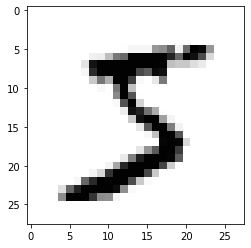

In [11]:
print("Label: %d" % label)
plt.imshow(reshaped_features, cmap='Greys')

# Printing this out, we see a pixellated 5, that tells us pretty much what we want to know about the way
# the data looks

Run the below cell to look at other examples

Label: 4


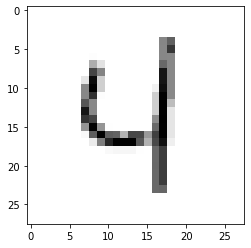

In [12]:
selected_feature_row = np.random.randint(0, 59999)
label = train_df.loc[selected_feature_row, 0]
features = train_df.loc[selected_feature_row, 1:].values
print("Label: %d" % label)
plt.imshow(features.reshape((28, 28)), cmap='Greys')